# Replication assignment

Replicate the results found in [Bryant et al  (2010)](https://doi.org/10.1016/j.techfore.2009.08.002), [Rozenberg et al (2014)](https://link.springer.com/content/pdf/10.1007/s10584-013-0904-3.pdf), and [Hamarat et al (2013)](https://doi.org/10.1016/j.techfore.2012.10.004). The data files are named accordingly. You can also look at [Kwakkel & Jaxa-Rozen (2016)](https://www.sciencedirect.com/science/article/pii/S1364815215301092), which gives a succint summary of these three cases. 

An additional useful, if dated, resource for Bryant et al is https://waterprogramming.wordpress.com/2015/08/05/scenario-discovery-in-python/ 



# Bryant & Lempert

Load the data using pandas. The experiments are in colums 2-10, while the outcome is in column 15. If you look at the paper carefully, you will see that they change the peel_alpha in PRIM. This controls the leniency of the algorithm.


In [1]:
#Reading the dataset
import pandas as pd

df_bryant = pd.read_csv('./data/Bryant et al 2010.csv')
df_bryant.head()

,renew req %,Pricing,Cellulosic cost,Total biomass,Feedstock distribution,Cellulosic yield,Oil elasticity,Demand elasticity,Electricity coproduction,oil supply shift,Biomass backstop price,input record,Expen change,Incremental cost,Less than 10%,Greater than 90%
0,0.25,1,124.900001,612.799988,0.04,89.500000,0.206,-0.469,1.83,0.078,162.199997,1001,60.00,276.47,0,0
1,0.25,1,67.300003,837.200012,0.18,95.900002,0.277,-0.380,0.01,-0.032,150.300003,1002,19.42,85.07,0,0
2,0.25,1,71.000000,740.400024,0.80,83.500000,0.445,-0.778,0.25,-0.093,135.800003,1003,17.76,200.11,0,0
3,0.25,1,80.099998,995.599976,0.58,82.400002,0.291,-0.334,0.08,-0.086,98.800003,1004,37.88,130.86,0,0
4,0.25,1,76.400002,476.399994,0.79,97.500000,0.443,-0.205,1.59,0.073,163.500000,1006,66.13,180.11,0,0


In [2]:
#subsetting the dataset into columns of experiments and outcomes format for further analysis
experiments = df_bryant.iloc[:, 2:11]
outcome = df_bryant.iloc[:, 15]

In [3]:
#uncertainties or dimensions
experiments.head()

,Cellulosic cost,Total biomass,Feedstock distribution,Cellulosic yield,Oil elasticity,Demand elasticity,Electricity coproduction,oil supply shift,Biomass backstop price
0,124.900001,612.799988,0.04,89.500000,0.206,-0.469,1.83,0.078,162.199997
1,67.300003,837.200012,0.18,95.900002,0.277,-0.380,0.01,-0.032,150.300003
2,71.000000,740.400024,0.80,83.500000,0.445,-0.778,0.25,-0.093,135.800003
3,80.099998,995.599976,0.58,82.400002,0.291,-0.334,0.08,-0.086,98.800003
4,76.400002,476.399994,0.79,97.500000,0.443,-0.205,1.59,0.073,163.500000


#### In the context of scenario discovery, the outcome variable is typically a binary variable denoting whether a given set of inputs is of interest or not.

In [4]:
#outcomes table is an array of [0,1] signifying if the outcome is of interest or not
outcome.head()


0    0
1    0
2    0
3    0
4    0
Name: Greater than 90%, dtype: int64

In [5]:
from ema_workbench.analysis import prim
from ema_workbench import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO);

#Prim algorithm with threshold 0.8 (80% outcomes of interest) and peeling away 0.1 (10%) each time
x = experiments
y = outcome
prim_alg = prim.Prim(x, y, threshold=0.8, peel_alpha = 0.1)
box_bryant = prim_alg.find_box()

C:\Users\lekha\Anaconda3\envs\gds\lib\site-packages\ema_workbench\em_framework\optimization.py:48: ImportWarning: platypus based optimization not available
  warnings.warn("platypus based optimization not available", ImportWarning)
[MainProcess/INFO] 882 points remaining, containing 89 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.05102040816326531, coverage: 0.5056179775280899, density: 1.0 restricted_dimensions: 6


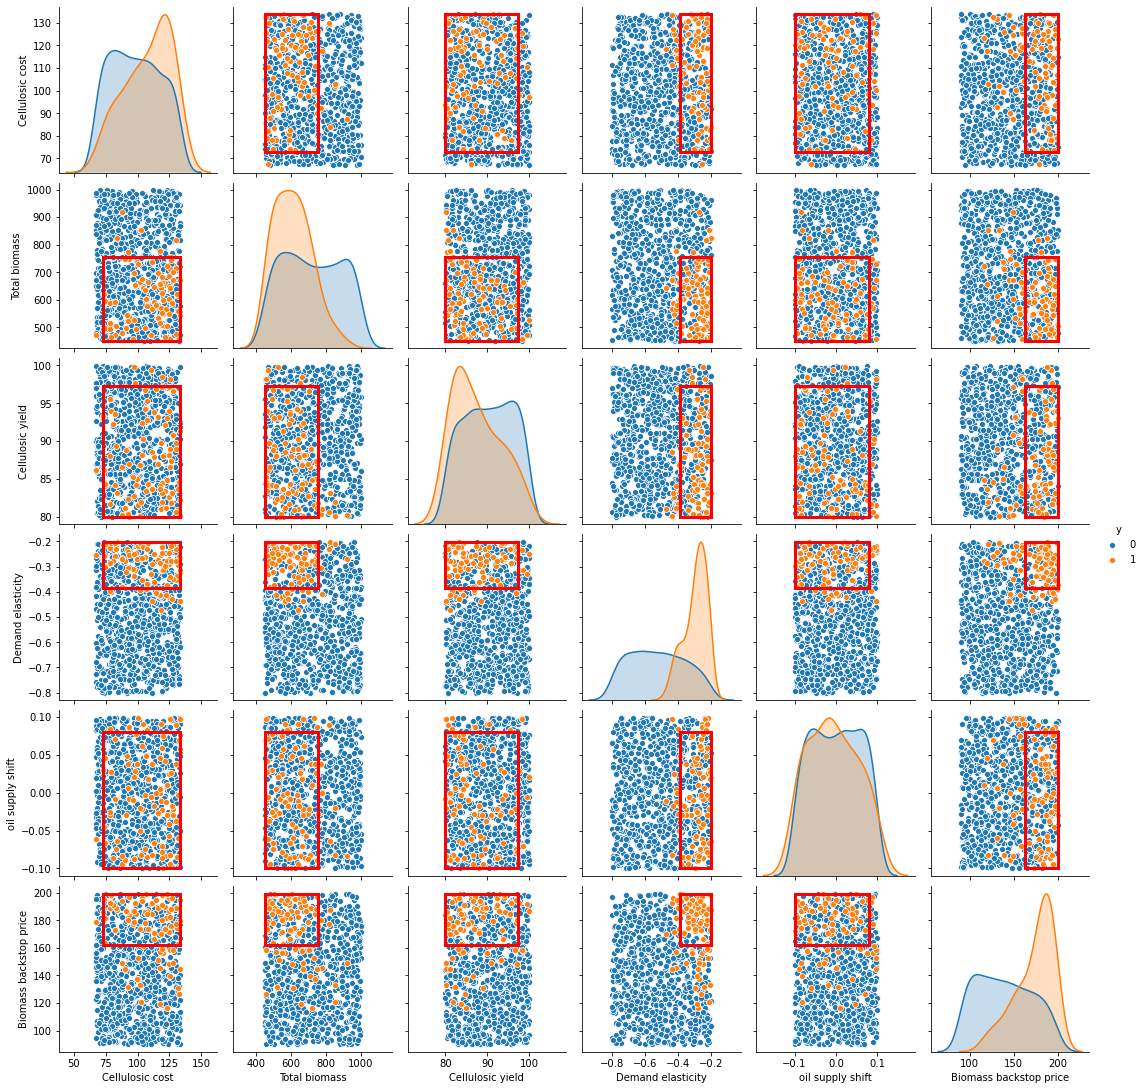

In [6]:
#Make a pair wise scatter plot of all the restricted dimensions with color denoting whether a given point is of
#interest or not and the boxlims superimposed on top.
box_bryant.show_pairs_scatter()

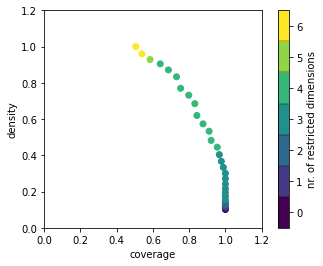

In [7]:
import matplotlib.pyplot as plt

#Visualize the trade off between coverage and density. Color is used to denote the number of restricted dimensions.
box_bryant.show_tradeoff()
plt.show()

In [8]:
#Interactive plot of the above tradeoff matrix
box_bryant.inspect_tradeoff()

alt.VConcatChart(...)

The filled-in circles represent the coverage and density combinations identified by PRIM when it is free to use any number of parameters. The figure also shows density-coverage combinations achieved while holding constant the total number of parameters used. These latter points are found by dropping the least important parameters from more complicated boxes. They thus do not represent a complete or optimal search, but do serve to illuminate tradeoffs between the scenario quality measures of coverage, density and interpretability (Bryant et al, 2010).

coverage     0.730337
density      0.833333
id                 22
mass        0.0884354
mean         0.833333
res_dim             4
Name: 22, dtype: object

                            box 22                                           
                               min         max                      qp values
Total biomass           450.000000  755.799988  [-1.0, 3.975269312730579e-06]
Demand elasticity        -0.422000   -0.202000  [5.677298162579917e-18, -1.0]
Biomass backstop price  155.550003  199.600006   [7.74627840480414e-14, -1.0]
Cellulosic cost          72.650002  133.699997     [0.1039150022362067, -1.0]



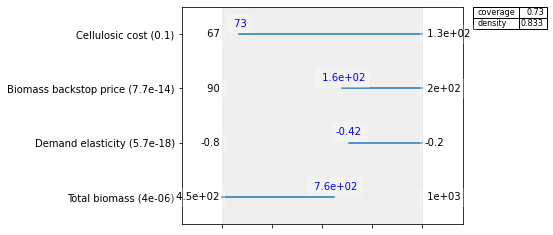

In [9]:
#Alternate way to look at the box in detail providing specific id. Write the stats and box limits of the 
#user specified box to
box_bryant.inspect(22)
box_bryant.inspect(22, style='graph')
plt.show()

In [10]:
#Trying to find another box which meets the criteria 
box2 = prim_alg.find_box()

[MainProcess/INFO] 837 points remaining, containing 44 cases of interest
[MainProcess/INFO] box does not meet threshold criteria, value is 0.5625, returning dump box


#### Another box of interest doesn't exist.

### Analysis

The best coverage we can find for the specified threshold is 0.50.

# Rozenberg et al


* The experiments are the first seven columns. The remainder specify whether a given experiment belongs to a given SSP.
* Apply prim separately for each SSP
* you have to play with the threshold for each SSP, the default of 0.8 is at times too high
* if you look at the paper carefully, you will discover that they change some of the default parameters of PRIM


In [11]:
import pandas as pd

df_rozenberg = pd.read_csv('./data/Rozenberg et al 2014.csv')

In [12]:
df_rozenberg

,inequalities,convergence,population,behaviors,technologies,fossils,capital markets,SSP1,SSP2,SSP3,SSP4,SSP5
0,0,2,0,0,0,0,0,0,0,0,0,0
1,0,2,0,0,0,0,1,0,0,0,0,0
2,0,2,0,0,0,1,0,0,0,0,0,0
3,0,2,0,0,0,1,1,0,0,0,0,0
4,0,2,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
281,1,1,2,1,0,1,1,0,0,0,0,0
282,1,1,2,1,1,0,0,1,0,0,0,0
283,1,1,2,1,1,0,1,1,0,0,0,0
284,1,1,2,1,1,1,0,0,0,0,0,0


In [13]:
experiments_rozenberg = df_rozenberg.iloc[:, 0:7]
outcome_rozenberg = df_rozenberg.iloc[:, 7:12]

In [14]:
experiments_rozenberg.head()

,inequalities,convergence,population,behaviors,technologies,fossils,capital markets
0,0,2,0,0,0,0,0
1,0,2,0,0,0,0,1
2,0,2,0,0,0,1,0
3,0,2,0,0,0,1,1
4,0,2,0,0,1,0,0


In [15]:
outcome_rozenberg.head()

,SSP1,SSP2,SSP3,SSP4,SSP5
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,1,0,0,0


### SSP1

In [16]:
from ema_workbench.analysis import prim

#PRIM for SSP1
prim_alg = prim.Prim(experiments_rozenberg, outcome_rozenberg['SSP1'], threshold=0.8, peel_alpha = 0.1)
box_ssp1_1 = prim_alg.find_box()

[MainProcess/INFO] 286 points remaining, containing 44 cases of interest
[MainProcess/INFO] mean: 0.9375, mass: 0.055944055944055944, coverage: 0.3409090909090909, density: 0.9375 restricted_dimensions: 4


In [17]:
box_ssp1_1.inspect_tradeoff()

alt.VConcatChart(...)

In [18]:
box_ssp1_2 = prim_alg.find_box()

[MainProcess/INFO] 270 points remaining, containing 29 cases of interest
[MainProcess/INFO] box does not meet threshold criteria, value is 0.6875, returning dump box


### SSP2

In [19]:
#PRIM for SSP2
prim_alg = prim.Prim(experiments_rozenberg, outcome_rozenberg['SSP2'], threshold=0.5, peel_alpha = 0.1)
box_ssp2_1 = prim_alg.find_box()

[MainProcess/INFO] 286 points remaining, containing 28 cases of interest
[MainProcess/INFO] mean: 0.5625, mass: 0.055944055944055944, coverage: 0.32142857142857145, density: 0.5625 restricted_dimensions: 4


In [20]:
box_ssp2_1.inspect_tradeoff()

alt.VConcatChart(...)

### SSP3

In [21]:
#PRIM for SSP3
prim_alg = prim.Prim(experiments_rozenberg, outcome_rozenberg['SSP3'], threshold=0.5, peel_alpha = 0.1)
box_ssp3_1 = prim_alg.find_box()

[MainProcess/INFO] 286 points remaining, containing 40 cases of interest
[MainProcess/INFO] mean: 0.9166666666666666, mass: 0.08391608391608392, coverage: 0.55, density: 0.9166666666666666 restricted_dimensions: 4


In [22]:
box_ssp3_1.inspect_tradeoff()

alt.VConcatChart(...)

### SSP4

In [23]:
#PRIM for SSP3
prim_alg = prim.Prim(experiments_rozenberg, outcome_rozenberg['SSP4'], threshold=0.8, peel_alpha = 0.1)
box_ssp4_1 = prim_alg.find_box()

[MainProcess/INFO] 286 points remaining, containing 23 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.055944055944055944, coverage: 0.6956521739130435, density: 1.0 restricted_dimensions: 4


In [24]:
box_ssp4_1.inspect_tradeoff()

alt.VConcatChart(...)

### SSP5

In [25]:
#PRIM for SSP3
prim_alg = prim.Prim(experiments_rozenberg, outcome_rozenberg['SSP5'], threshold=0.4, peel_alpha = 0.1)
box_ssp5_1 = prim_alg.find_box()

[MainProcess/INFO] 286 points remaining, containing 19 cases of interest
[MainProcess/INFO] mean: 0.4583333333333333, mass: 0.08391608391608392, coverage: 0.5789473684210527, density: 0.4583333333333333 restricted_dimensions: 3


In [26]:
box_ssp5_1.inspect_tradeoff()

alt.VConcatChart(...)

# Hamarat et al

this is the most difficult dataset to analyze with prim. It has been generated using the ema_workbench and can be loaded with the `load_results` function. Experiments are of interest if the end state for `'fraction renewables'` is lower than the initial value.

* PRIM struggles with finding a good explanation for this case, why?
* [Dalal et al (2013)](https://www.sciencedirect.com/science/article/pii/S1364815213001345) suggest using PCA preprocessing. The ema_workbench supports this with the `pca_preprocess` function. See also examples/prim_PCA_preprocess.py. Does PCA preprocessing makes a difference for this case?


In [27]:
import ema_workbench
experiments, outcomes = ema_workbench.util.utilities.load_results('./data/Hamarat et al 2013.gz')

[MainProcess/INFO] results loaded succesfully from C:\Users\lekha\Desktop\Quarter4\Model Based Decision Making\Lab\Week 3-4 - vulnerability analysis\data\Hamarat et al 2013.gz


In [31]:
experiments, outcomes = ema_workbench.util.utilities.load_results("data/Hamarat et al 2013.gz")
data = outcomes["fraction renewables"]
difference = pd.Series([a[-1] - a[0] for a in data])
prim_alg = prim.Prim(experiments, difference < 0, threshold=0.7)

box_normal = prim_alg.find_box()

[MainProcess/INFO] results loaded succesfully from C:\Users\lekha\Desktop\Quarter4\Model Based Decision Making\Lab\Week 3-4 - vulnerability analysis\data\Hamarat et al 2013.gz
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] 5000 points remaining, containing 871 cases of interest
[MainProcess/INFO] mean: 0.732824427480916, mass: 0.0524, coverage: 0.22043628013777267, density: 0.732824427480916 restricted_dimensions: 12


In [32]:
box_normal.inspect_tradeoff()

alt.VConcatChart(...)

#### It is difficult to analyse the dataset with PRIM because 1. the outcome of interest is a formula instead of a binary 0 or 1 and 2. Underlying model is a SD model and non linear (that's why PCA would help) and outcomes are located along the diagonal

In [ ]:
#An idea - throw a linear classification tree algorithm at this dataset and see if it works

### PCA processing

A PCA rotation transforms the original model input parameters so that PRIM can then identify high quality hyper-rectangular scenarios in the new rotated coordination system. 

In [34]:
#Dropping categorical variables as PCA process takes only numeric values

df = experiments
df = df.drop(df.iloc[:,0:12], axis=1)
df = df.drop(df.iloc[:,34:36], axis=1)

In [36]:
#PCA processing on the data
processed = ema_workbench.analysis.prim.pca_preprocess(df,difference < 0)
exp, out = processed

In [41]:
#PRIM
prim_alg = prim.Prim(exp, difference < 0, threshold=0.7, peel_alpha = 0.1)
box_pca = prim_alg.find_box()

[MainProcess/INFO] 5000 points remaining, containing 871 cases of interest
[MainProcess/INFO] mean: 0.7043795620437956, mass: 0.0548, coverage: 0.22158438576349024, density: 0.7043795620437956 restricted_dimensions: 12


In [42]:
box_pca.inspect_tradeoff()

alt.VConcatChart(...)

We see that dimension reduction using pca processing helps remove the noise and aids analysis.